In [213]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [214]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 81)

In [215]:
#Import files
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [216]:
#show top 5 rows of the dataset
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [217]:
# Show dataset rows/columns
data_train.shape

(1460, 81)

In [218]:
# show info of each column (some column contain missing value)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [219]:
# Show duplicated (in this case no duplicate row)
data_train.duplicated().sum()

0

In [220]:
# Show missing value count of each column
data_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [221]:
# Analyzing SalePrice variable
data_train.SalePrice.describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/pitchakorn/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

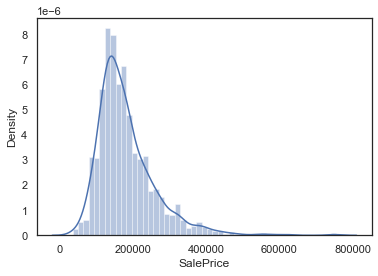

In [222]:
# Plot SalePrice distribution (Right skewed)
sns.set_style('white')
sns.distplot(data_train.SalePrice)

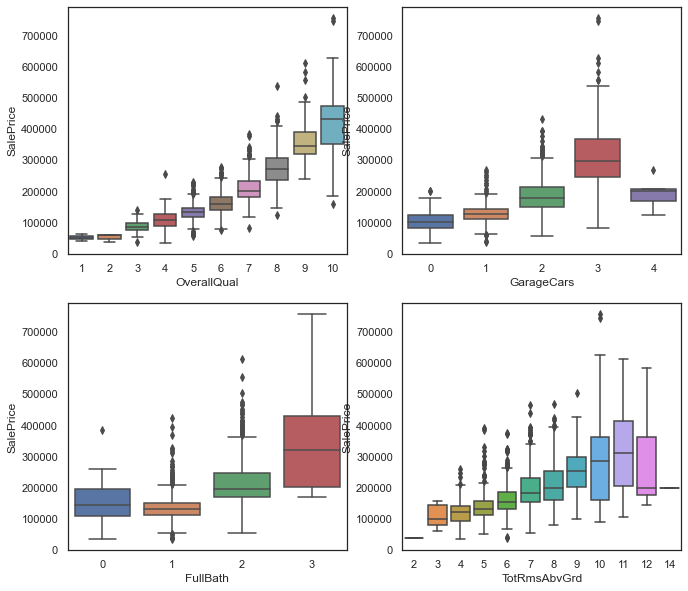

In [223]:
# Outliers of categorical data
fig, axs = plt.subplots(2, 2)

sns.boxplot(ax=axs[0, 0], x = data_train.OverallQual, y = data_train.SalePrice)
sns.boxplot(ax=axs[0, 1], x = data_train.GarageCars, y = data_train.SalePrice)
sns.boxplot(ax=axs[1, 0], x = data_train.FullBath, y = data_train.SalePrice)
sns.boxplot(ax=axs[1, 1], x = data_train.TotRmsAbvGrd, y = data_train.SalePrice)

fig.set_size_inches(11, 10)

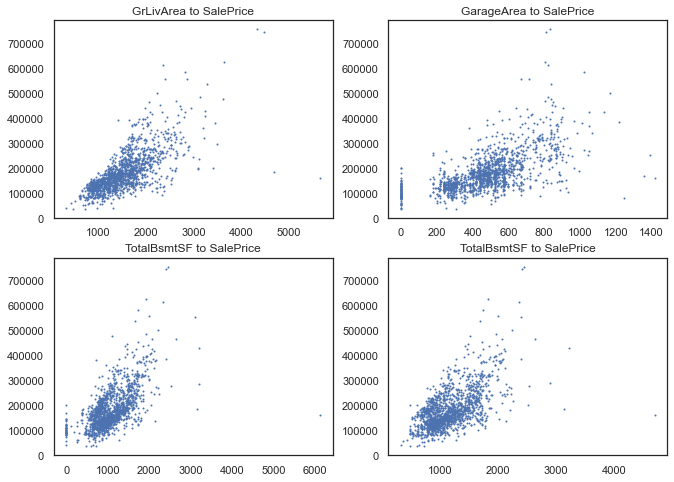

In [224]:
# Outliers of numerical data
fig, ax = plt.subplots(2,2)

ax[0, 0].plot(data_train.GrLivArea, data_train.SalePrice, marker='o', ms=1, ls='')
ax[0, 0].set_title('GrLivArea to SalePrice')

ax[0, 1].plot(data_train.GarageArea, data_train.SalePrice, marker='o', ms=1, ls='')
ax[0, 1].set_title('GarageArea to SalePrice')

ax[1, 0].plot(data_train.TotalBsmtSF, data_train.SalePrice, marker='o', ms=1, ls='')
ax[1, 0].set_title('TotalBsmtSF to SalePrice')

ax[1, 1].plot(data_train['1stFlrSF'], data_train.SalePrice, marker='o', ms=1, ls='')
ax[1, 1].set_title('TotalBsmtSF to SalePrice')

fig.set_size_inches(11, 8)


In [225]:
# Show columns with missing value
null_cols_train = data_train.columns[data_train.isnull().any()]
null_cols_test = data_test.columns[data_test.isnull().any()]

print(null_cols_train, len(null_cols_train))
print(null_cols_test, len(null_cols_test))

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object') 19
Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object') 33


In [226]:
# data_train[null_cols_train].info()
data_test[null_cols_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotFrontage   1232 non-null   float64
 2   Alley         107 non-null    object 
 3   Utilities     1457 non-null   object 
 4   Exterior1st   1458 non-null   object 
 5   Exterior2nd   1458 non-null   object 
 6   MasVnrType    1443 non-null   object 
 7   MasVnrArea    1444 non-null   float64
 8   BsmtQual      1415 non-null   object 
 9   BsmtCond      1414 non-null   object 
 10  BsmtExposure  1415 non-null   object 
 11  BsmtFinType1  1417 non-null   object 
 12  BsmtFinSF1    1458 non-null   float64
 13  BsmtFinType2  1417 non-null   object 
 14  BsmtFinSF2    1458 non-null   float64
 15  BsmtUnfSF     1458 non-null   float64
 16  TotalBsmtSF   1458 non-null   float64
 17  BsmtFullBath  1457 non-null   float64
 18  BsmtHalfBath  1457 non-null 

In [227]:
#Values that are missing because it is not exist e.g.House with no garage or basement
values_to_replace = {
    'Alley': 'None',
    'MasVnrType': 'None',
    'MasVnrArea': 0,
    'BsmtQual': 'None',
    'BsmtCond': 'None',
    'BsmtExposure': 'None',
    'BsmtFinType1': 'None',
    'BsmtFinType2': 'None',
    'BsmtFinSF1': 0,
    'BsmtFinSF2': 0,
    'BsmtUnfSF': 0,
    'TotalBsmtSF': 0,
    'BsmtFullBath': 0,
    'BsmtHalfBath': 0,
    'FireplaceQu': 'None',
    'GarageType': 'None',
    'GarageYrBlt': 1900.0, #Assume year built
    'GarageFinish': 'None',
    'GarageQual': 'None',
    'GarageCond': 'None',
    'GarageCars': 0,
    'GarageArea': 0,
    'PoolQC': 'None',
    'Fence': 'None',
    'MiscFeature': 'None'
}

data_train.fillna(values_to_replace, inplace=True)
data_test.fillna(values_to_replace, inplace=True)

In [228]:
# LotFrontage, Electrical, MSZoning, Utilities, Exterior1/2, KitchenQual, Functional, SaleType

#Mode: electrical, MSZoning, Utilities, Exterior1/2, KitchenQual, SaleType
#Mean/Median: Lotfrontage
#Assume typ: functional

# Fill missing value for categorical feature
replace_with_mode = ['Electrical', 'MSZoning', 'Utilities', 'Exterior1st',
                   'Exterior2nd', 'KitchenQual', 'SaleType']

for col in replace_with_mode:
    data_train[col] = data_train[col].fillna(data_train[col].mode()[0])
    data_test[col] = data_test[col].fillna(data_test[col].mode()[0])

# Fill missing value for Funtional feature
data_test['Functional'] = data_test['Functional'].fillna('Typ')

#Fill missing value for numerical feature
data_train['LotFrontage'] = data_train.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.mean()))
data_test['LotFrontage'] = data_test.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.mean()))

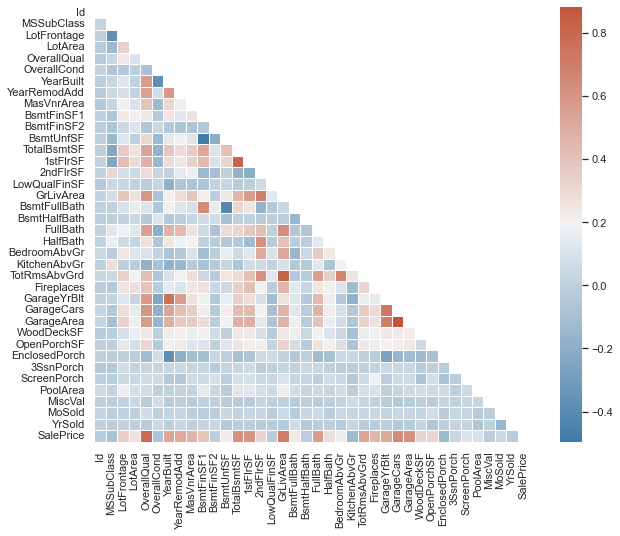

In [229]:
# Correlation matrix
corr_matrix = data_train.select_dtypes(exclude="object").corr()
custom_cmap = sns.diverging_palette(240, 20, s=75,  n=9, as_cmap=True)
custom_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(11,8))
sns.heatmap(corr_matrix,mask=custom_mask, cmap=custom_cmap,
            annot=False, square=True, linewidths=.5)
plt.show()


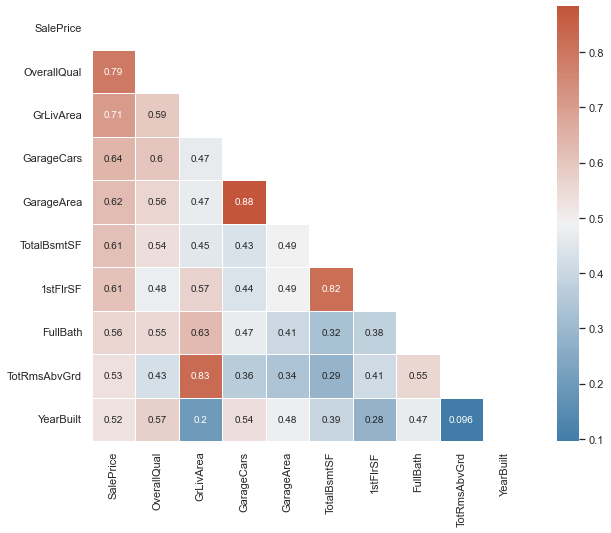

In [230]:
#Pick 10 features highly correlated with SalePrice
columns = corr_matrix.nlargest(10, 'SalePrice').index
top_corr_mat = data_train[columns].corr()
top_corr_mask = np.triu(np.ones_like(top_corr_mat, dtype=bool))
plt.figure(figsize=(11,8))
sns.heatmap(top_corr_mat, mask=top_corr_mask, cmap=custom_cmap,
            annot=True, square=True, linewidths=.5)
plt.show()

/Users/pitchakorn/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


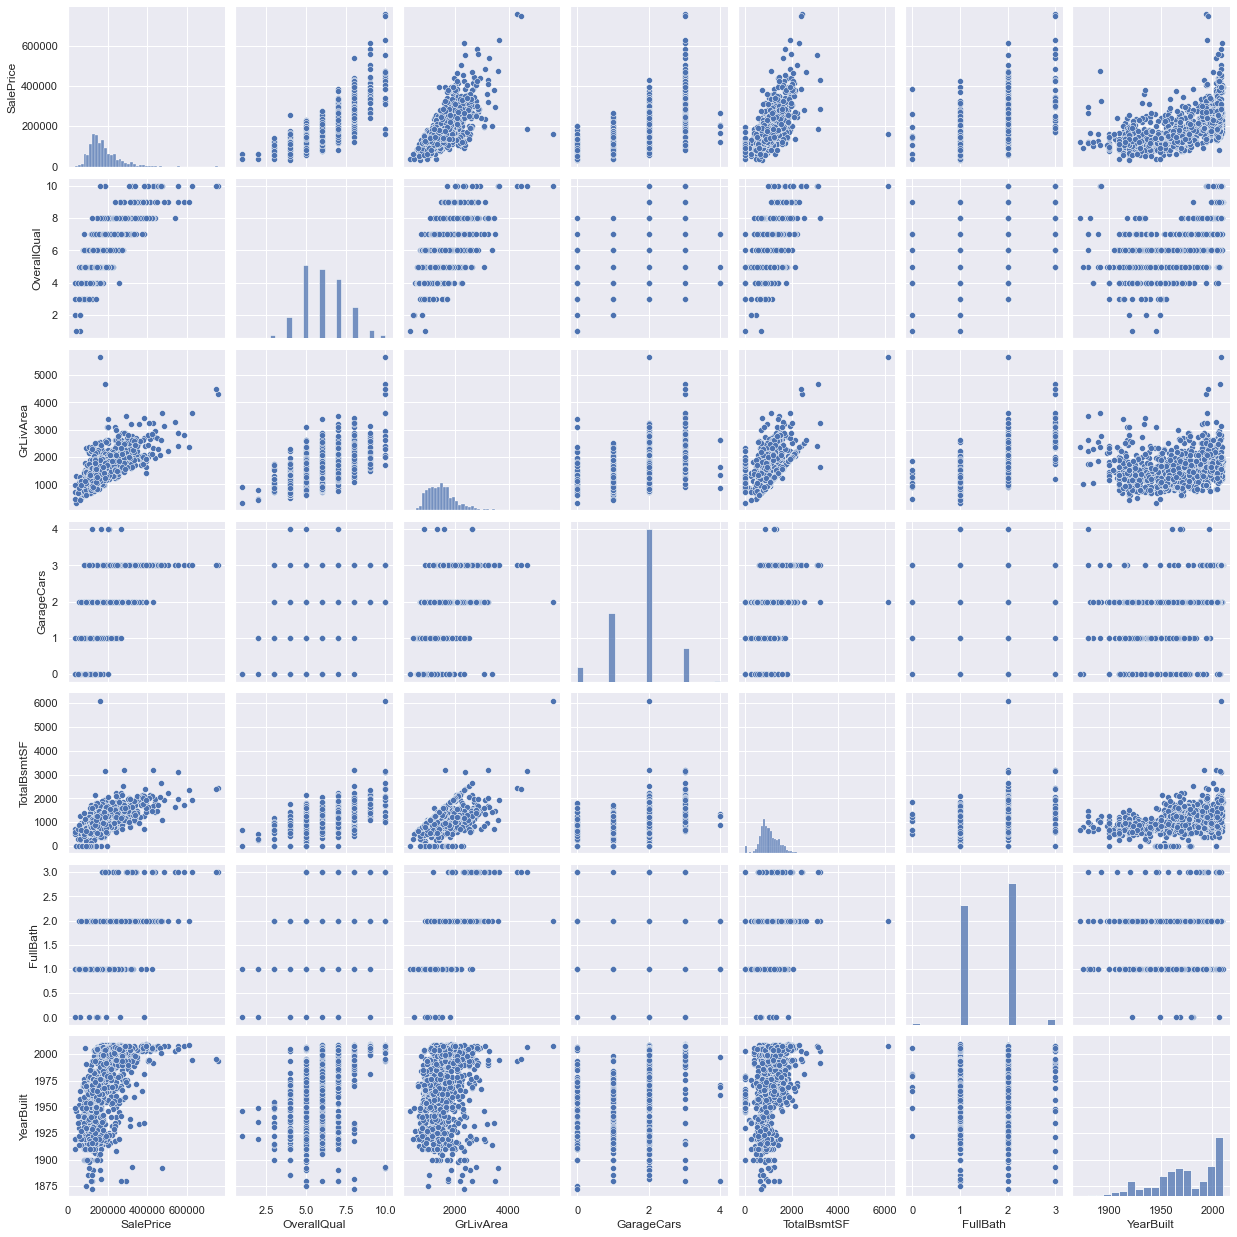

In [231]:
sns.set()
col_used = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_train[col_used], size=2.5)
plt.show()

In [232]:
#Encode categorical features
for key, value in data_train.items():
    if pd.api.types.is_string_dtype(value):
        data_train[key] = value.astype("category").cat.as_ordered()

In [233]:
#Replace category with the numerical code
for key, value in data_train.items():
    if not pd.api.types.is_numeric_dtype(value):
        data_train[key] = pd.Categorical(value).codes+1

In [234]:
#Removing outlier using z-score
from scipy.stats import zscore

z = np.abs(zscore(data_train[data_train.columns]))

data_train_z = data_train.copy()[(z < 10).all(axis=1)]

print("Before: ", data_train.shape)
print("After: ", data_train_z.shape)

Bf:  (1460, 81)
Af:  (1422, 81)


In [235]:
#Split train test
from sklearn.model_selection import train_test_split

data_train = data_train.drop("Id", axis=1)
x = data_train.drop(["SalePrice"], axis=1)
y = data_train["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,
                                                    test_size=0.2, random_state=42)

In [237]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Score: ", model.score(x_test, y_test))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred, ))
print("Mean square error: ", mean_squared_error(y_test, y_pred))
print("Root mean square error: ", mean_squared_error(y_test, y_pred, squared=False))
print("Target mean: ", y.mean())
print("Target standard deviation: ", np.std(y))

Score:  0.8437875060882143
Mean absolute error:  21490.168831688195
Mean square error:  1198200785.941629
Root mean square error:  34615.036991770336
Target mean:  180921.19589041095
Target standard deviation:  79415.29188606751


/Users/pitchakorn/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual')

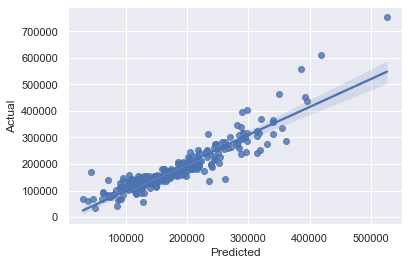

In [240]:
sns.regplot(y_pred, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")